В этом задании мы используем датасет для работы с классификацией. Мы продолжаем работать в том же агрохолдинге, где работали с ирисами. Теперь нам дали новую задачу, которая концептуально похожа на предыдущую, — у нас в руках датасет о качестве яблок.

Яблоки бывают хорошие и плохие. Но если урожай большой, то придется потратить много времени, чтобы разобраться с качеством каждого отдельного яблока. Поэтому заказчики предложили разработать алгоритм классификации яблок на хорошие и плохие. А чтобы объяснить неспециалистам принципы работы нашей классификации, нужно создать много визуализаций.

In [1]:
pip install mlxtend


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

In [3]:
apples = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv')
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Задача 1. Сравнение качества работы kNN при разных параметрах k

### Задача 1.1 (2 балла)
Напишите функцию, которая будет:

Отбирать все числовые признаки в датасете.
Перебирать все сочетания по два признака (без повторений) и запускать для каждой пары признаков алгоритм kNN (с k = 10). Для каждой итерации необходимо считать accuracy. Зависимая переменная  указывается отдельно при подаче в функцию.
Возвращает названия двух признаков, которые дали наибольший accuracy score. Если accuracy score совпадают для двух или нескольких пар, верните первую найденную вами пару.

In [4]:
apples.info()
apples.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


<Axes: >

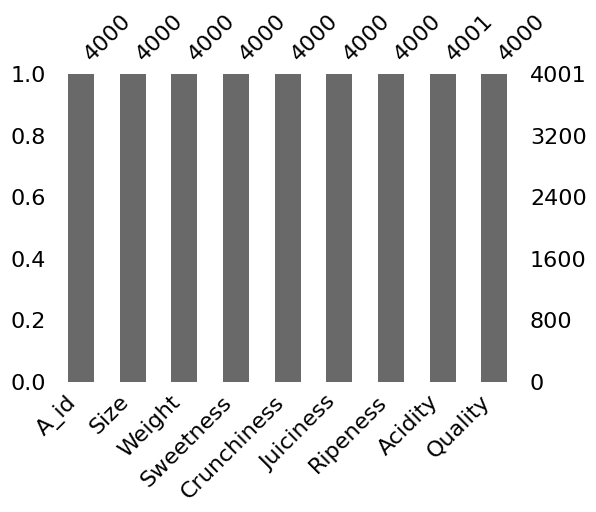

In [5]:
#Графическое представление отсутствия пропусков
msno.bar(apples, figsize=(6,4))

In [6]:
def knn_two_features(df, y):
  '''
  df - датасет, который мы подаем для перебора алгоритмов
  y - зависимая переменная (класс признаков), которую мы хотим предсказать
  '''
  
  num = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
  if y in num:
    num.remove(y)

  for el in combinations(num, 2):
    X = df[list(el)]
    y_true = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)

    if current_accuracy > -1:
      result = el  
  return result

In [7]:
#предобработка
apples_copy = apples.copy()
apples_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
for el in apples_copy.select_dtypes(include=['float64', 'int64']).columns:
    apples_copy[el].fillna(apples_copy[el].mean(), inplace=True)    
for el in apples_copy.select_dtypes(exclude=['float64', 'int64']).columns:
    apples_copy[el] = apples_copy[el].astype(str) 

In [8]:
knn_two_features(apples_copy, "Quality")

('Juiciness', 'Ripeness')

### Задача 1.2 (2 балла)
Мы получили два признака, которые вместе дают наибольший accuracy score. Теперь покрутите их, одновременно изменяя параметр k. С помощью plot_decision_regions библиотеки mlxtend.plotting постройте поле 3х3 из визуализаций результатов работы алгоритма kNN с разными параметрами k. Параметры k можно взять следующие: 1, 2, 5, 10, 15, 20, 30, 40, 50.

Подробнее о том, как работать с этой функцией, можно почитать в инструкции. Там же есть информация, как создать поле размером 3х3 для построения графиков.

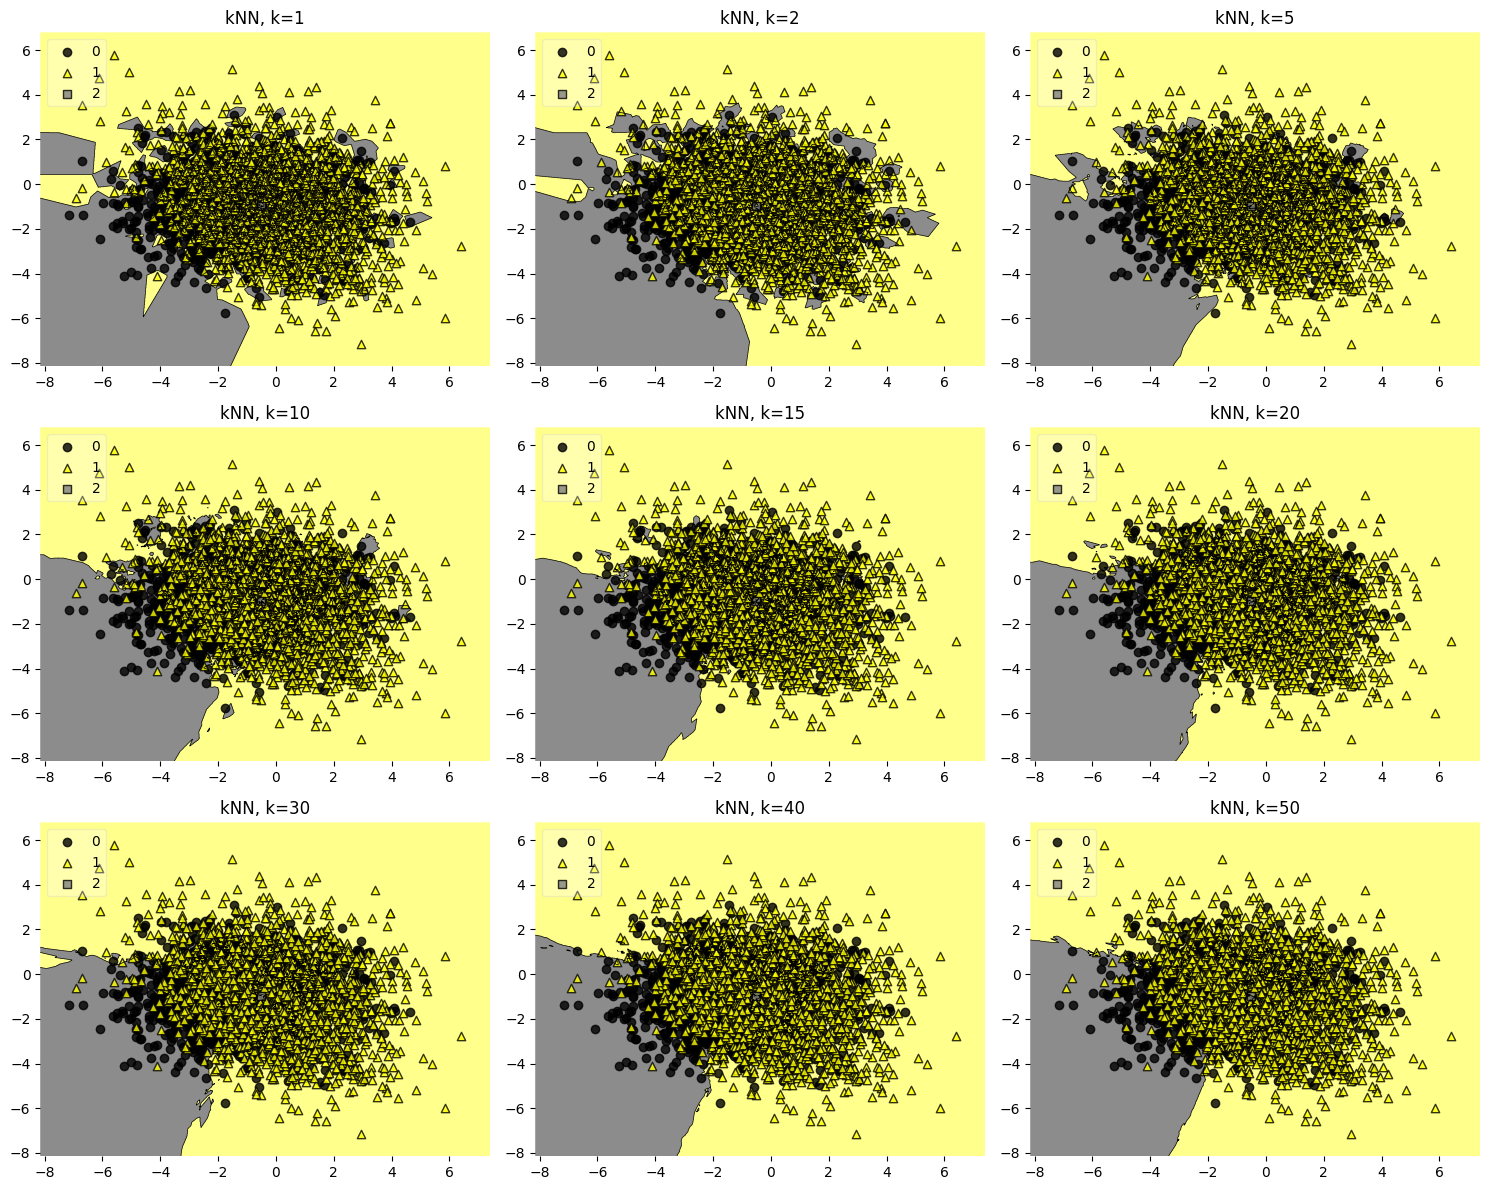

In [10]:
X = apples_copy[['Size', 'Weight']].values 
y = LabelEncoder().fit_transform(apples_copy['Quality'])

list_k = [1, 2, 5, 10, 15, 20, 30, 40, 50]


fig, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for el, k in enumerate(list_k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    plot_decision_regions(X, y, clf=model, ax=ax[el], legend=2, markers='o^s', colors='black,yellow,gray')
    ax[el].set_title(f'kNN, k={k}')

plt.tight_layout()
plt.show()

### Задача 1.3 (1 балл)
Функция plot_decision_regions удобна тем, что ее можно использовать для визуализации разных алгоритмов классификации.

Выберите два параметра, которые кажутся вам наиболее важными при оценке качества яблок. Используйте их, чтобы построить алгоритм решающего дерева.
Также постройте решающее дерево для признаков, которые были отобраны в пункте 1.1.
Создайте поле 1х2 и визуализируйте полученные результаты. Каждый график озаглавьте.

# Задача 2. Визуализация алгоритмов решающего дерева

### Задача 2.1 (1 балл)
Аналогично пункту 1.1, создайте две функции для алгоритмов решающего дерева:

Функцию, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
Такую же функцию, но которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).

### Задача 2.2 (1 балл)
Создайте три различных двумерных графика для визуализации результатов работы алгоритма случайного леса (из пункта 1 задачи 2.1). Можете использовать любые библиотеки (включая модули graphviz, dtreeviz).

### Задача 2.3 (1 балл)
Аналогично предыдущему пункту, создайте три трехмерных графика (или псевдотрехмерных — двумерных, где цветом отображено третье измерение) для того алгоритма случайного леса с тремя параметрами, который вы получили во втором пункте задачи 2.1.

# Задача 3. Градиентный спуск для функции одной переменной (2 балла)

# Задача 4. Визуализация градиентного спуска для трехмерной функции (4 балла)